In [2]:
# Loading the required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import datetime as dt

In [2]:
#importing the dataset, downloaded from kaggle.com

ipl = pd.read_csv('IPL Matches 2008-2020.csv')

In [3]:
#having a glance at first five records of dataset

ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan


In [4]:
#Looking at the number of rows and columns
ipl.shape

(816, 17)

In [5]:
#Getting the frequency of the man of the match awards

ipl['player_of_match'].value_counts()

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
                  ..
S Anirudha         1
M Kartik           1
R McLaren          1
RJ Harris          1
PJ Cummins         1
Name: player_of_match, Length: 233, dtype: int64

In [6]:
#Top 10 players who won the man of the match

ipl['player_of_match'].value_counts().head(10)

AB de Villiers    23
CH Gayle          22
RG Sharma         18
DA Warner         17
MS Dhoni          17
SR Watson         16
YK Pathan         16
SK Raina          14
V Kohli           13
G Gambhir         13
Name: player_of_match, dtype: int64

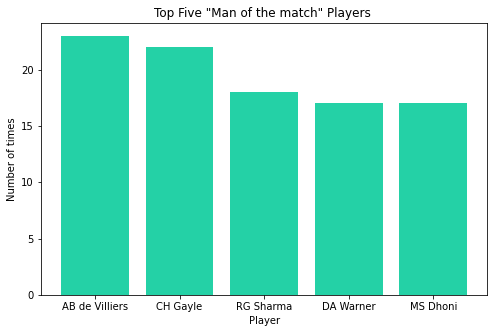

In [7]:
#making the bar plot 

player_names = list(ipl['player_of_match'].value_counts().head(10).keys())
frequency = list(ipl['player_of_match'].value_counts().head(10))

plt.figure(figsize=(8,5))
plt.bar(player_names[:5],frequency[:5],color = '#24d1a6')
plt.title('Top Five "Man of the match" Players ')
plt.xlabel('Player')
plt.ylabel('Number of times')
plt.show()

In [8]:
#counting the number of results
ipl['result'].value_counts()

wickets    435
runs       364
tie         13
Name: result, dtype: int64

In [9]:
#finding out the number of toss winner with respect to each team

ipl['toss_winner'].value_counts()

Mumbai Indians                 106
Kolkata Knight Riders           98
Chennai Super Kings             97
Royal Challengers Bangalore     87
Rajasthan Royals                87
Kings XI Punjab                 85
Delhi Daredevils                80
Sunrisers Hyderabad             57
Deccan Chargers                 43
Pune Warriors                   20
Delhi Capitals                  20
Gujarat Lions                   15
Kochi Tuskers Kerala             8
Rising Pune Supergiants          7
Rising Pune Supergiant           6
Name: toss_winner, dtype: int64

In [10]:
#extracting the records of when team won after batting first
batting_first = ipl[ipl['result'] =='runs'] 

In [11]:
batting_first.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri
7,335989,Chennai,2008-04-23,ML Hayden,"MA Chidambaram Stadium, Chepauk",0,Chennai Super Kings,Mumbai Indians,Mumbai Indians,field,Chennai Super Kings,runs,6.0,N,NaN,DJ Harper,GA Pratapkumar
9,335991,Chandigarh,2008-04-25,KC Sangakkara,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Mumbai Indians,Mumbai Indians,field,Kings XI Punjab,runs,66.0,N,NaN,Aleem Dar,AM Saheba
14,335996,Bangalore,2008-04-28,MS Dhoni,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,13.0,N,NaN,BR Doctrove,RB Tiffin


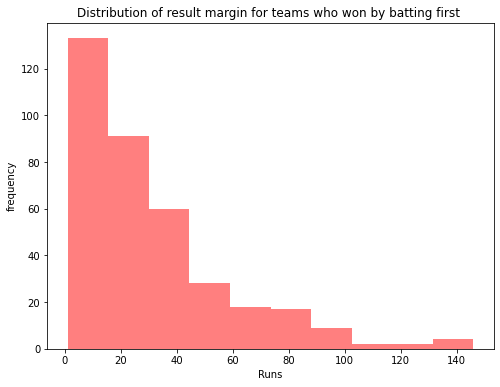

In [12]:
#making histogram of result_margin of teams who won by batting_first
plt.figure(figsize=(8,6))
plt.hist(batting_first['result_margin'], color = 'red', alpha  = 0.5)
plt.title('Distribution of result margin for teams who won by batting first ')
plt.xlabel('Runs')
plt.ylabel('frequency')
plt.show()

In [13]:
#finding out the number of wins w.r.t. each team after batting first


<BarContainer object of 5 artists>

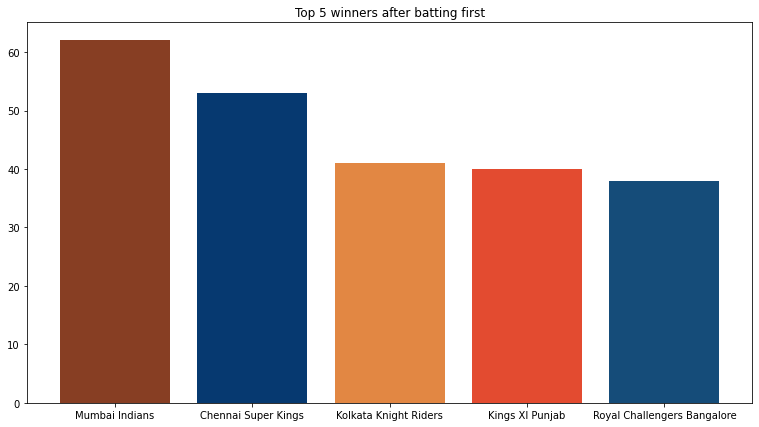

In [14]:
batting_first['winner'].value_counts()
plt.figure(figsize=(13,7))
plt.title("Top 5 winners after batting first")
plt.bar(batting_first['winner'].value_counts().keys()[:5],batting_first['winner'].value_counts()[:5],
    color = ['#873e23','#063970','#e28743','#e34b30','#154c79']
        )

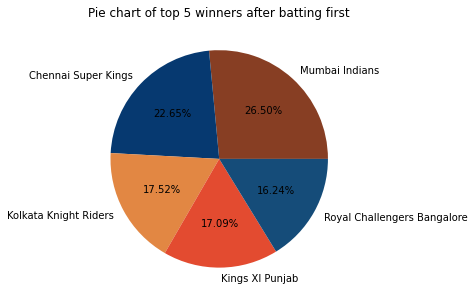

In [15]:
#making a pie chart
plt.figure(figsize=(7,5))
plt.title('Pie chart of top 5 winners after batting first')
plt.pie(list(batting_first['winner'].value_counts().head(5)),labels = list(batting_first['winner'].value_counts().head(5).keys()),
        autopct='%1.2f%%', colors=  ['#873e23','#063970','#e28743','#e34b30','#154c79'])
plt.show()



In [16]:
batting_second = ipl[ipl['result'] =='wickets'] 

In [17]:
#Taking a glance at records where team won by taking batting second
batting_second.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan
5,335987,Jaipur,2008-04-21,SR Watson,Sawai Mansingh Stadium,0,Rajasthan Royals,Kings XI Punjab,Kings XI Punjab,bat,Rajasthan Royals,wickets,6.0,N,NaN,Aleem Dar,RB Tiffin
6,335988,Hyderabad,2008-04-22,V Sehwag,"Rajiv Gandhi International Stadium, Uppal",0,Deccan Chargers,Delhi Daredevils,Deccan Chargers,bat,Delhi Daredevils,wickets,9.0,N,NaN,IL Howell,AM Saheba


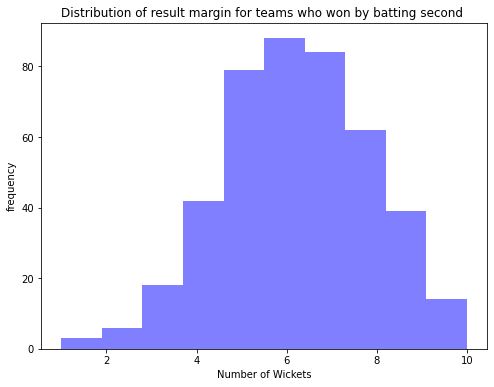

In [18]:
#making histogram of result_margin of teams who won by batting_seconds
plt.figure(figsize=(8,6))
plt.hist(batting_second['result_margin'], color = 'blue', alpha  = 0.5)
plt.title('Distribution of result margin for teams who won by batting second ')
plt.xlabel('Number of Wickets')
plt.ylabel('frequency')
plt.show()

In [19]:
#finding out the number of wins w.r.t. each team after batting second
batting_second['winner'].value_counts()

Kolkata Knight Riders          57
Mumbai Indians                 56
Chennai Super Kings            53
Royal Challengers Bangalore    51
Rajasthan Royals               51
Kings XI Punjab                45
Delhi Daredevils               42
Sunrisers Hyderabad            31
Gujarat Lions                  12
Deccan Chargers                11
Delhi Capitals                  8
Pune Warriors                   6
Rising Pune Supergiant          5
Kochi Tuskers Kerala            4
Rising Pune Supergiants         3
Name: winner, dtype: int64

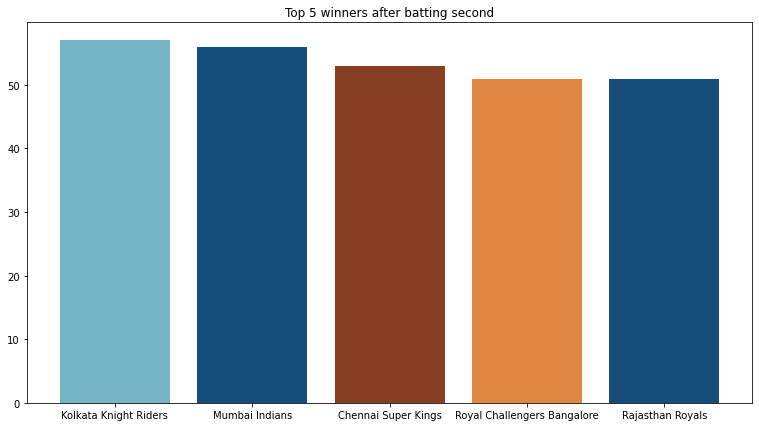

In [20]:
#Ploting the top 5 winners who won after batting second
plt.figure(figsize=(13,7))
plt.title("Top 5 winners after batting second")
plt.bar(batting_second['winner'].value_counts().keys()[:5],batting_second['winner'].value_counts()[:5],
    color = ['#76b5c5','#154c79','#873e23','#e28743','#154c79']
        )
plt.show()

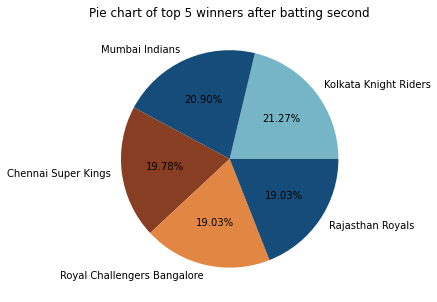

In [21]:
#making a pie chart
plt.figure(figsize=(7,5))
plt.title('Pie chart of top 5 winners after batting second')
plt.pie(list(batting_second['winner'].value_counts().head(5)),labels = list(batting_second['winner'].value_counts().head(5).keys()),
        autopct='%1.2f%%', colors=  ['#76b5c5','#154c79','#873e23','#e28743','#154c79'])
plt.show()


In [22]:
#finding which year has most number of matches
ipl['year'] = pd.DatetimeIndex(ipl['date']).year
ipl['year'].value_counts()

2013    76
2012    74
2011    73
2010    60
2014    60
2016    60
2018    60
2019    60
2020    60
2015    59
2017    59
2008    58
2009    57
Name: year, dtype: int64

In [23]:
#finding which city has most number of matches

ipl['city'].value_counts()

Mumbai            101
Kolkata            77
Delhi              74
Bangalore          65
Hyderabad          64
Chennai            57
Chandigarh         56
Jaipur             47
Pune               38
Abu Dhabi          29
Dubai              26
Bengaluru          15
Durban             15
Visakhapatnam      13
Ahmedabad          12
Sharjah            12
Centurion          12
Rajkot             10
Dharamsala          9
Indore              9
Johannesburg        8
Cuttack             7
Cape Town           7
Port Elizabeth      7
Ranchi              7
Raipur              6
Kochi               5
Kanpur              4
East London         3
Kimberley           3
Nagpur              3
Bloemfontein        2
Name: city, dtype: int64

In [24]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [25]:
#finding the number of matches where team won after winning the toss
np.sum(ipl['toss_winner'] == ipl['winner'])

418

In [26]:
np.sum(ipl['toss_winner'] == ipl['winner'])

418

In [31]:
#finding the percent of winners who won the match after winning the toss
percent = np.sum(ipl['toss_winner'] == ipl['winner'])/(ipl['winner'].count())*100
print ("{0:.2f}".format(percent))


51.48


# ---------- Analysing the ball-by-ball deliveries data ----------

In [3]:
deliveries = pd.read_csv('IPL Ball-by-Ball 2008-2020.csv')

In [4]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,NaN,NaN,NaN,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [5]:
deliveries.shape

(193468, 18)

In [8]:
#checking for null values

deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind           0
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [38]:
deliveries['dismissal_kind'].value_counts()

caught                   5743
bowled                   1700
run out                   893
lbw                       571
stumped                   294
caught and bowled         269
hit wicket                 12
retired hurt               11
obstructing the field       2
Name: dismissal_kind, dtype: int64

In [9]:
#Filling null values

deliveries['dismissal_kind'].fillna('No Dismissal', inplace=True)

In [43]:
deliveries['dismissal_kind'].value_counts()

No Dismissal             183973
caught                     5743
bowled                     1700
run out                     893
lbw                         571
stumped                     294
caught and bowled           269
hit wicket                   12
retired hurt                 11
obstructing the field         2
Name: dismissal_kind, dtype: int64

In [44]:
deliveries['dismissal_kind'].isnull().sum()

0

In [45]:
deliveries.isnull().sum()

id                       0
inning                   0
over                     0
ball                     0
batsman                  0
non_striker              0
bowler                   0
batsman_runs             0
extra_runs               0
total_runs               0
non_boundary             0
is_wicket                0
dismissal_kind           0
player_dismissed    183973
fielder             186684
extras_type         183235
batting_team             0
bowling_team           191
dtype: int64

In [52]:
deliveries['player_dismissed'].value_counts()

No one dismissed     183973
RG Sharma               167
RV Uthappa              165
SK Raina                161
V Kohli                 154
                      ...  
AN Ahmed                  1
Mohammad Ashraful         1
A Uniyal                  1
RS Gavaskar               1
DR Sams                   1
Name: player_dismissed, Length: 507, dtype: int64

In [10]:
deliveries['player_dismissed'].fillna('No one dismissed', inplace=True)

In [11]:
deliveries['fielder'].fillna('No fielder', inplace=True)

In [55]:
deliveries['extras_type'].fillna('No extra', inplace = True)

In [56]:
deliveries.isnull().sum()

id                    0
inning                0
over                  0
ball                  0
batsman               0
non_striker           0
bowler                0
batsman_runs          0
extra_runs            0
total_runs            0
non_boundary          0
is_wicket             0
dismissal_kind        0
player_dismissed      0
fielder               0
extras_type           0
batting_team          0
bowling_team        191
dtype: int64

In [57]:
deliveries['bowling_team'].value_counts()

Mumbai Indians                 24453
Royal Challengers Bangalore    23024
Kolkata Knight Riders          22583
Kings XI Punjab                22457
Chennai Super Kings            21224
Rajasthan Royals               18972
Delhi Daredevils               18719
Sunrisers Hyderabad            14703
Deccan Chargers                 9039
Pune Warriors                   5394
Delhi Capitals                  4012
Gujarat Lions                   3540
Rising Pune Supergiant          1928
Rising Pune Supergiants         1615
Kochi Tuskers Kerala            1614
Name: bowling_team, dtype: int64

In [59]:
deliveries['bowling_team'].isnull().sum()

191

In [60]:
deliveries[deliveries['bowling_team'].isnull()]

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
57048,501265,1,0,1,NV Ojha,DA Warner,AC Thomas,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,No extra,Delhi Daredevils,NaN
57049,501265,1,0,2,DA Warner,NV Ojha,AC Thomas,0,1,1,0,0,No Dismissal,No one dismissed,No fielder,legbyes,Delhi Daredevils,NaN
57050,501265,1,1,1,DA Warner,NV Ojha,JP Faulkner,0,1,1,0,0,No Dismissal,No one dismissed,No fielder,legbyes,Delhi Daredevils,NaN
57051,501265,1,1,2,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,No extra,Delhi Daredevils,NaN
57052,501265,1,1,3,NV Ojha,DA Warner,JP Faulkner,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,No extra,Delhi Daredevils,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
115654,829763,1,7,3,AB de Villiers,Mandeep Singh,STR Binny,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,No extra,Royal Challengers Bangalore,NaN
115655,829763,1,8,6,AB de Villiers,Mandeep Singh,SR Watson,2,0,2,0,0,No Dismissal,No one dismissed,No fielder,No extra,Royal Challengers Bangalore,NaN
115656,829763,1,9,1,Mandeep Singh,AB de Villiers,STR Binny,4,0,4,0,0,No Dismissal,No one dismissed,No fielder,No extra,Royal Challengers Bangalore,NaN
115657,829763,1,8,4,AB de Villiers,Mandeep Singh,SR Watson,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,No extra,Royal Challengers Bangalore,NaN


In [12]:
deliveries.head()

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
0,335982,1,6,5,RT Ponting,BB McCullum,AA Noffke,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
1,335982,1,6,6,BB McCullum,RT Ponting,AA Noffke,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
2,335982,1,7,1,BB McCullum,RT Ponting,Z Khan,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
3,335982,1,7,2,BB McCullum,RT Ponting,Z Khan,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Kolkata Knight Riders,Royal Challengers Bangalore
4,335982,1,7,3,RT Ponting,BB McCullum,Z Khan,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Kolkata Knight Riders,Royal Challengers Bangalore


In [62]:
ipl.head()

,id,city,date,player_of_match,venue,neutral_venue,team1,team2,toss_winner,toss_decision,winner,result,result_margin,eliminator,method,umpire1,umpire2,year
0,335982,Bangalore,2008-04-18,BB McCullum,M Chinnaswamy Stadium,0,Royal Challengers Bangalore,Kolkata Knight Riders,Royal Challengers Bangalore,field,Kolkata Knight Riders,runs,140.0,N,NaN,Asad Rauf,RE Koertzen,2008
1,335983,Chandigarh,2008-04-19,MEK Hussey,"Punjab Cricket Association Stadium, Mohali",0,Kings XI Punjab,Chennai Super Kings,Chennai Super Kings,bat,Chennai Super Kings,runs,33.0,N,NaN,MR Benson,SL Shastri,2008
2,335984,Delhi,2008-04-19,MF Maharoof,Feroz Shah Kotla,0,Delhi Daredevils,Rajasthan Royals,Rajasthan Royals,bat,Delhi Daredevils,wickets,9.0,N,NaN,Aleem Dar,GA Pratapkumar,2008
3,335985,Mumbai,2008-04-20,MV Boucher,Wankhede Stadium,0,Mumbai Indians,Royal Challengers Bangalore,Mumbai Indians,bat,Royal Challengers Bangalore,wickets,5.0,N,NaN,SJ Davis,DJ Harper,2008
4,335986,Kolkata,2008-04-20,DJ Hussey,Eden Gardens,0,Kolkata Knight Riders,Deccan Chargers,Deccan Chargers,bat,Kolkata Knight Riders,wickets,5.0,N,NaN,BF Bowden,K Hariharan,2008


In [63]:
# Finding the counts of deliveries in each match.
deliveries['id'].value_counts()

829737     262
829811     259
1216522    259
1178423    257
419142     257
          ... 
392183     108
829807     106
598068     100
501265      63
1178424     51
Name: id, Length: 816, dtype: int64

In [22]:
#Finding info about a particular match (ex. 829737 -- Mumbai Indians vs Royal Challengers Bangalore)

#first inning
match_829737 = deliveries[(deliveries['id'] == 829737) & (deliveries['inning'] == 1)]

In [24]:
match_829737_second_inning = deliveries[(deliveries['id'] == 829737) & (deliveries['inning'] == 2)]

In [18]:
match_829737

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
112710,829737,1,3,2,LMP Simmons,PA Patel,VR Aaron,0,1,1,0,0,No Dismissal,No one dismissed,No fielder,wides,Mumbai Indians,Royal Challengers Bangalore
112711,829737,1,3,3,LMP Simmons,PA Patel,VR Aaron,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112712,829737,1,3,4,LMP Simmons,PA Patel,VR Aaron,4,0,4,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112713,829737,1,3,5,LMP Simmons,PA Patel,VR Aaron,4,0,4,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112714,829737,1,3,6,LMP Simmons,PA Patel,VR Aaron,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112893,829737,1,19,3,HH Pandya,Harbhajan Singh,AN Ahmed,2,0,2,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112894,829737,1,19,4,HH Pandya,Harbhajan Singh,AN Ahmed,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112895,829737,1,19,5,HH Pandya,Harbhajan Singh,AN Ahmed,6,0,6,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore
112896,829737,1,19,6,HH Pandya,Harbhajan Singh,AN Ahmed,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Mumbai Indians,Royal Challengers Bangalore


In [25]:
match_829737_second_inning

,id,inning,over,ball,batsman,non_striker,bowler,batsman_runs,extra_runs,total_runs,non_boundary,is_wicket,dismissal_kind,player_dismissed,fielder,extras_type,batting_team,bowling_team
112693,829737,2,17,2,D Wiese,Iqbal Abdulla,MJ McClenaghan,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112694,829737,2,17,3,D Wiese,Iqbal Abdulla,MJ McClenaghan,4,0,4,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112695,829737,2,17,4,D Wiese,Iqbal Abdulla,MJ McClenaghan,4,0,4,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112696,829737,2,17,5,D Wiese,Iqbal Abdulla,MJ McClenaghan,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112697,829737,2,18,3,D Wiese,Iqbal Abdulla,SL Malinga,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112950,829737,2,13,4,D Wiese,AB de Villiers,Harbhajan Singh,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112951,829737,2,13,5,D Wiese,AB de Villiers,Harbhajan Singh,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112952,829737,2,13,6,D Wiese,AB de Villiers,Harbhajan Singh,1,0,1,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians
112953,829737,2,13,2,D Wiese,AB de Villiers,Harbhajan Singh,0,0,0,0,0,No Dismissal,No one dismissed,No fielder,NaN,Royal Challengers Bangalore,Mumbai Indians


In [27]:
#finding info about runs in 1st innning of match 829737
match_829737['batsman_runs'].value_counts()

0    59
1    32
4    23
6    10
2     4
Name: batsman_runs, dtype: int64

In [28]:
#finding info about wickets in 1st innning of match 829737

match_829737['dismissal_kind'].value_counts()

No Dismissal         121
caught                 4
bowled                 1
caught and bowled      1
run out                1
Name: dismissal_kind, dtype: int64

In [30]:
#finding info about runs in 2nd innning  (match_829737_second_inning)

match_829737_second_inning['batsman_runs'].value_counts()

0    65
1    35
4    20
6     8
2     6
Name: batsman_runs, dtype: int64

In [32]:
#finding info about wickets in 1st innning of (match_829737_second_inning)

match_829737_second_inning['dismissal_kind'].value_counts()

No Dismissal    127
caught            3
bowled            3
run out           1
Name: dismissal_kind, dtype: int64